In [3]:
import glob
import pandas as pd
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import glob, os
import matplotlib.pyplot as plt

In [7]:
N = 100

file_env_1 = 'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k/S16_C16_N1000_random_samples.csv'
df_env1 = pd.read_csv(file_env_1).head(N).sort_values(by=['config_id'],ascending=False).reset_index()


file_env_2 = 'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k/S16_C8_N100_random_samples.csv'
df_env2 = pd.read_csv(file_env_2).head(N).sort_values(by=['config_id'],ascending=False).reset_index()

file_env_3 = 'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k/S8_C1_N50_random_samples.csv'
df_env3 = pd.read_csv(file_env_3).head(N).sort_values(by=['config_id'],ascending=False).reset_index()

columns_to_plot = ["rcv_throughput_pb",
"decomp_throughput_pb",
"write_throughput_pb",
"read_throughput_pb",
"deser_throughput_pb",
"comp_throughput_pb",
"send_throughput_pb"]

thread_count = {
"rcv_throughput_pb":"rcv_par",
"decomp_throughput_pb":"decomp_par",
"write_throughput_pb":"write_par",
"read_throughput_pb":"read_par",
"deser_throughput_pb":"deser_par",
"comp_throughput_pb":"comp_par",
"send_throughput_pb":"send_par"
}

for col in columns_to_plot:

    plt.figure(figsize=(14,5))

    plt.plot(df_env1[col],label="S16_C16_N1000")
    plt.plot(df_env2[col],label="S16_C8_N100")
    plt.plot(df_env3[col],label="S8_C1_N50")

    plt.title(col)
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()


    plt.figure(figsize=(14,5))

    plt.plot((df_env1[col] * df_env1[thread_count[col]]),label="S16_C16_N1000")
    plt.plot((df_env2[col] * df_env2[thread_count[col]]),label="S16_C8_N100")
    plt.plot((df_env3[col] * df_env3[thread_count[col]]),label="S8_C1_N50")
    
    plt.title(col + " mutliplied by " + thread_count[col])
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k/S16_C8_N100_random_samples.csv'

NameError: name 'col' is not defined

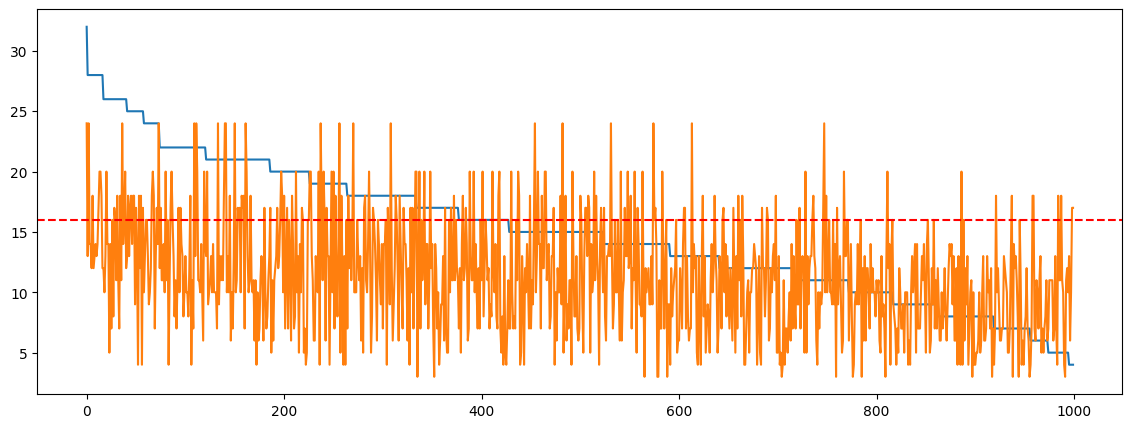

In [5]:
N = 1000

file_configs = 'C:/Users/bened/Desktop/Uni/repos/xdbc-client/experiments/model_optimizer/random_samples_1310k/grid_configurations_FIXED.csv'
df_configs = pd.read_csv(file_configs).head(N).sort_values(by=['config_id'],ascending=False).reset_index()

columns_to_plot = ["rcv_throughput_pb",
"decomp_throughput_pb",
"write_throughput_pb",
"read_throughput_pb",
"deser_throughput_pb",
"comp_throughput_pb",
"send_throughput_pb"]

thread_count = {
"rcv_throughput_pb":"rcv_par",
"decomp_throughput_pb":"decomp_par",
"write_throughput_pb":"write_par",
    
"read_throughput_pb":"read_par",
"deser_throughput_pb":"deser_par",
"comp_throughput_pb":"comp_par",
"send_throughput_pb":"send_par"
}

df_configs['rcv_par'] = df_configs['send_par']

df_configs['thread_sum_server'] = df_configs['read_par'] + df_configs['deser_par'] + df_configs['comp_par'] + df_configs['send_par']
df_configs['thread_sum_client'] = df_configs['rcv_par'] + df_configs['decomp_par'] + df_configs['write_par']


df_configs = df_configs.sort_values(by=['thread_sum_server'],ascending=False).reset_index()

plt.figure(figsize=(14,5))

plt.plot(df_configs['thread_sum_server'],label="thread_sum_server")
plt.plot(df_configs['thread_sum_client'],label="thread_sum_client")
plt.axhline(y=16, color='red', linestyle='--', label='16')
plt.title(col)
plt.ylim(bottom=0)
plt.grid()
plt.legend()
plt.show()

print("\nThreadsum Client Table :")

thresholds_client = [2, 4, 8, (8*1.2), 16, (16 *1.2)]

# Calculate the percentage of values below each threshold
percentages_client = []
for threshold in thresholds_client:
    percent_below = (df_configs["thread_sum_client"] < threshold).mean() * 100
    percentages_client.append({"Threshold": threshold, "Percent Below": percent_below})

result_df_client = pd.DataFrame(percentages_client)
print(result_df_client)

thresholds_server = [2, 4, 8,(8*1.2), 16, (16 * 1.2)]

print("\nThreadsum Server Table :")

percentages_server = []
for threshold in thresholds_server:
    percent_below = (df_configs["thread_sum_server"] < threshold).mean() * 100
    percentages_server.append({"Threshold": threshold, "Percent Below": percent_below})

result_df_server = pd.DataFrame(percentages_server)
print(result_df_server)

Number of Environments : 24
 Server  Client  Network
      2       2       50
      2       8       50
      4      16       50
      8       8       50
      8       2       50
     16       4       50
     16       8       50
     16      16       50
      2       2      150
      2       8      150
      4      16      150
      8       8      150
      8       2      150
     16       4      150
     16       8      150
     16      16      150
      2       2     1000
      2       8     1000
      4      16     1000
      8       8     1000
      8       2     1000
     16       4     1000
     16       8     1000
     16      16     1000


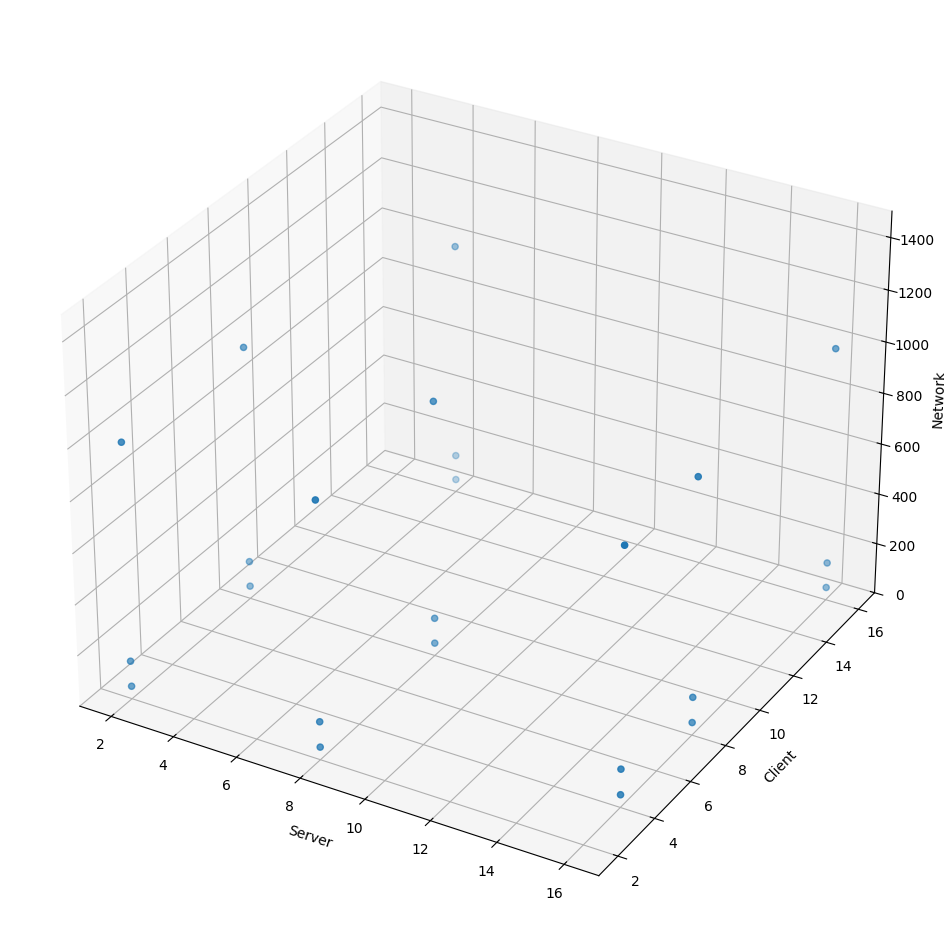

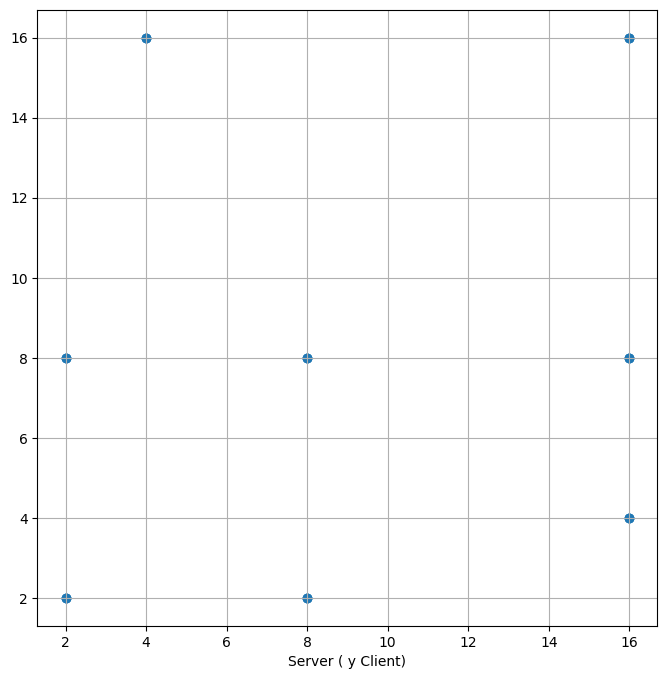

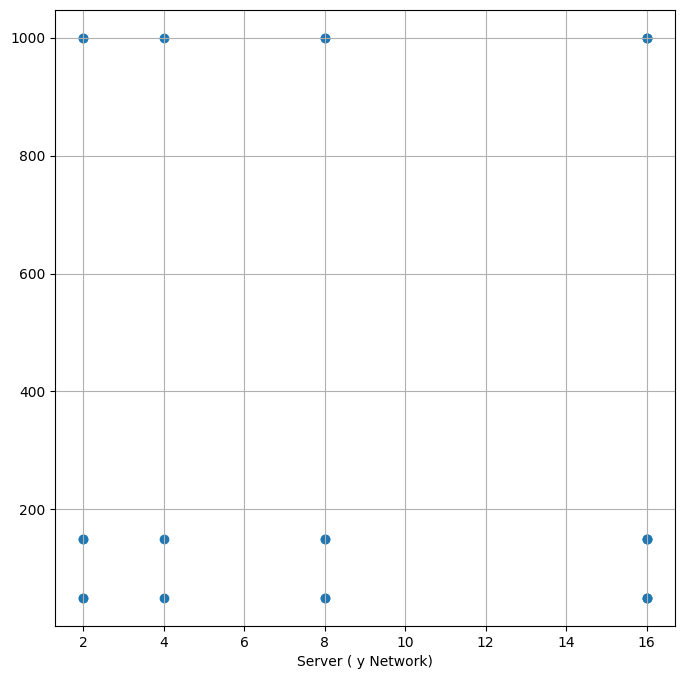

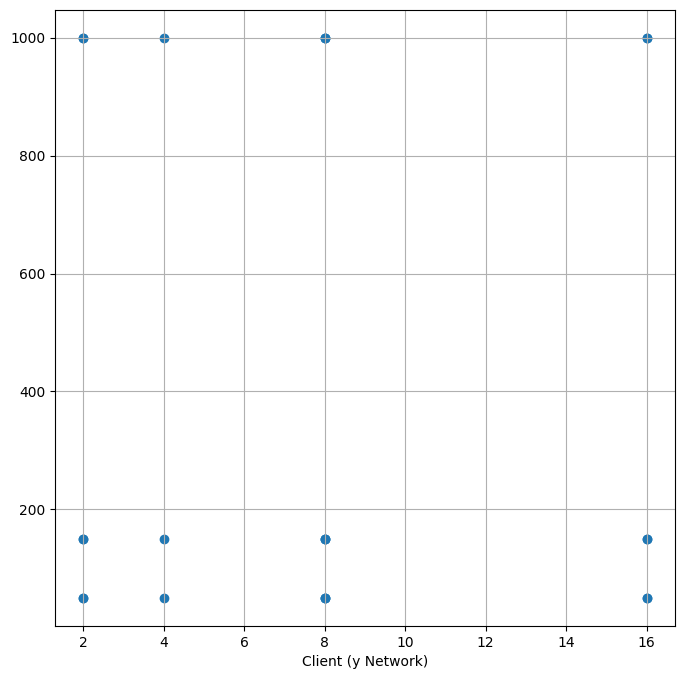

In [62]:
import pandas as pd
import itertools

server_values = [2, 4, 8, 16]
client_values = [2, 4, 8, 16]
network_values = [50, 150, 1000]

# Generate all possible combinations
combinations = list(itertools.product(server_values, client_values, network_values))

combinations = {
    'Server':[2,2,4 ,8,8,16,16,16,          2,2,4 ,8,8,16,16,16,                2,2,4 ,8,8,16,16,16,],
    'Client':[2,8,16,8,2,4 ,8,16,          2,8,16,8,2,4 ,8,16,                2,8,16,8,2,4 ,8,16 ], 
    'Network':[50,50,50,50,50,50,50,50    , 150,150,150,150,150,150,150,150    ,1000,1000,1000,1000,1000,1000,1000,1000]
          }


environments = pd.DataFrame(combinations, columns=['Server', 'Client', 'Network'])

#environments = environments[environments['Server'] >= environments['Client']]

print("Number of Environments : " + str(len(environments)))


print(environments.to_string(index=False))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(environments.Server,environments.Client,environments.Network)
ax.set_xlabel('Server')
ax.set_ylabel('Client')
ax.set_zlabel('Network')
ax.set_zlim(0, 1500)
plt.show()


plt.figure(figsize=(8, 8))
plt.scatter(environments.Server,environments.Client)
plt.grid()
plt.xlabel("Server ( y Client)")
#plt.ylabel("Client")
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(environments.Server,environments.Network)
plt.grid()
plt.xlabel("Server ( y Network)")
#plt.ylabel("Client")
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(environments.Client,environments.Network)
plt.grid()
plt.xlabel("Client (y Network)")
#plt.ylabel("Client")
plt.show()

In [60]:

i = 100
for index,row in environments.iterrows():
    '''
    print(f"environment_{i} = " + "{")
    print(f"\"server_cpu\": {row["Server"]},")
    print(f"\"client_cpu\": {row["Client"]},")
    print(f"\"network\": {row["Network"]},")
    print(f"\"timeout\": 350")
    print("}")
    '''
    #print(f"environment_{i},", end="")

    #print(f"\"S{row["Server"]}_C{row["Client"]}_N{row["Network"]}\",", end="")

    print(f"env_S{row["Server"]}_C{row["Client"]}_N{row["Network"]} = environment_{i}")


    i = i+1
    

env_S2_C2_N50 = environment_100
env_S2_C8_N50 = environment_101
env_S4_C4_N50 = environment_102
env_S4_C16_N50 = environment_103
env_S8_C8_N50 = environment_104
env_S8_C2_N50 = environment_105
env_S16_C4_N50 = environment_106
env_S16_C16_N50 = environment_107
env_S2_C2_N150 = environment_108
env_S2_C8_N150 = environment_109
env_S4_C4_N150 = environment_110
env_S4_C16_N150 = environment_111
env_S8_C8_N150 = environment_112
env_S8_C2_N150 = environment_113
env_S16_C4_N150 = environment_114
env_S16_C16_N150 = environment_115
env_S2_C2_N1000 = environment_116
env_S2_C8_N1000 = environment_117
env_S4_C4_N1000 = environment_118
env_S4_C16_N1000 = environment_119
env_S8_C8_N1000 = environment_120
env_S8_C2_N1000 = environment_121
env_S16_C4_N1000 = environment_122
env_S16_C16_N1000 = environment_123
